In [1]:
def createFaceList(list):
    v_list=sorted(list, key=lambda x: (x[0], x[1]))
    h_list=sorted(list, key=lambda x: (x[1], x[0]))
    face_list=[]
    start=v_list[0]
    current=start
    face_list.append(current)
    f=-1
    while True:
        if f==-1:
            index=v_list.index(current)
            if index%2==0:
                current=v_list[index+1]
            else:
                current=v_list[index-1]
        else:
            index=h_list.index(current)
            if index%2==0:
                current=h_list[index+1]
            else:
                current=h_list[index-1]
        if current==start:
            break
        face_list.append(current)
        f=f*-1
    return face_list
   
store=[[1,0,0], [2,0,0], [3,0,0]]
vertices=[]
for i in store:
    v=[]
    v.append([i[0],i[1],i[2]])
    v.append([i[0],i[1],i[2]-1])
    v.append([i[0],i[1]-1,i[2]])
    v.append([i[0],i[1]-1,i[2]-1])
    v.append([i[0]+1,i[1],i[2]])
    v.append([i[0]+1,i[1],i[2]-1])
    v.append([i[0]+1,i[1]-1,i[2]])
    v.append([i[0]+1,i[1]-1,i[2]-1])
   
    for vertex in v:
        if vertex not in vertices:
            vertices.append(vertex)
        else:
            vertices.remove(vertex)

layers={} # dictionary to represent each plane layer by layer
#for xy plane
vertices.sort(key = lambda x:x[2])
layers["xy plane"]={}
z0=vertices[0][2]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][2]==z0:
        l.append([vertices[i][0],vertices[i][1]])
    elif vertices[i][2]!=z0:
        layers["xy plane"]["layer "+str(layer)+" where z = "+str(vertices[i-1][2])]=createFaceList(l)
        m=i
        z0=vertices[i][2]
        l=[]
        l.append([vertices[i][0],vertices[i][1]])
        layer+=1
layers["xy plane"]["layer "+str(layer)+" where z = "+str(vertices[m][2])]=createFaceList(l)

#for yz plane
vertices.sort(key = lambda x:x[0])
layers["yz plane"]={}
z0=vertices[0][0]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][0]==z0:
        l.append([vertices[i][1],vertices[i][2]])
    elif vertices[i][0]!=z0:
        layers["yz plane"]["layer "+str(layer)+" where x = "+str(vertices[i-1][0])]=createFaceList(l)
        m=i
        z0=vertices[i][0]
        l=[]
        l.append([vertices[i][1],vertices[i][2]])
        layer+=1
layers["yz plane"]["layer "+str(layer)+" where x = "+str(vertices[m][0])]=createFaceList(l)
        
#for zx plane
vertices.sort(key = lambda x:x[1])
layers["zx plane"]={}
z0=vertices[0][1]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][1]==z0:
        l.append([vertices[i][0],vertices[i][2]])
    elif vertices[i][1]!=z0:
        layers["zx plane"]["layer "+str(layer)+" where y = "+str(vertices[i-1][1])]=createFaceList(l)
        m=i
        z0=vertices[i][1]
        l=[]
        l.append([vertices[i][0],vertices[i][2]])
        layer+=1
layers["zx plane"]["layer "+str(layer)+" where y = "+str(vertices[m][1])]=createFaceList(l)

for k in layers:
    print(k+":")
    for j in layers[k]:
        print("\t"+j+":\t"+str(layers[k][j]))
    print("\n")

xy plane:
	layer 1 where z = -1:	[[1, -1], [1, 0], [4, 0], [4, -1]]
	layer 2 where z = 0:	[[1, -1], [1, 0], [4, 0], [4, -1]]


yz plane:
	layer 1 where x = 1:	[[-1, -1], [-1, 0], [0, 0], [0, -1]]
	layer 2 where x = 4:	[[-1, -1], [-1, 0], [0, 0], [0, -1]]


zx plane:
	layer 1 where y = -1:	[[1, -1], [1, 0], [4, 0], [4, -1]]
	layer 2 where y = 0:	[[1, -1], [1, 0], [4, 0], [4, -1]]




<IPython.core.display.Javascript object>


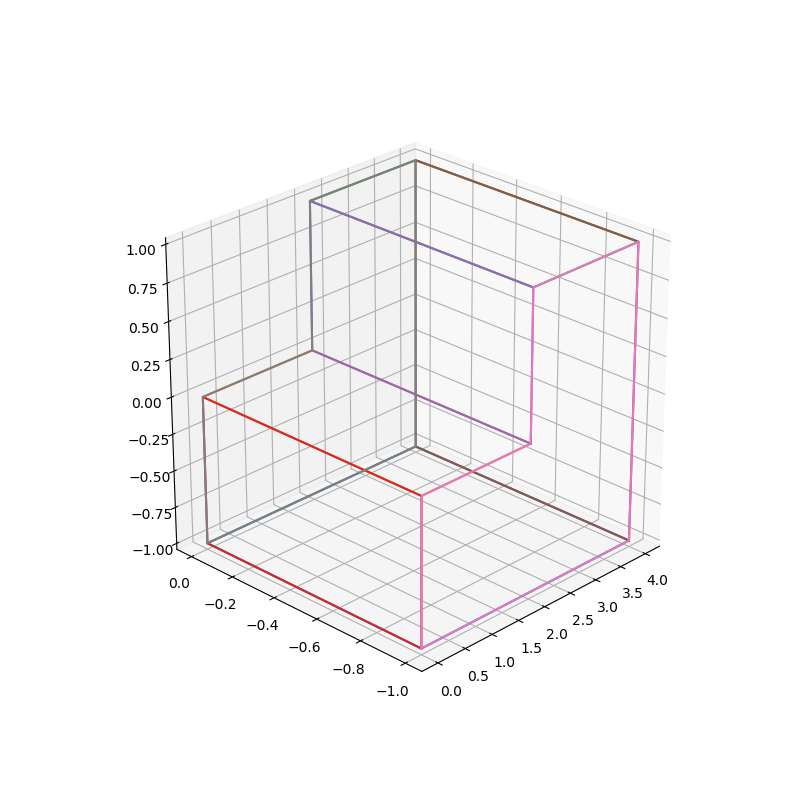

xy plane:
	layer 1 where z = -1:	[[0, -1], [0, 0], [4, 0], [4, -1]]
[[0, -1, -1], [0, 0, -1], [4, 0, -1], [4, -1, -1]]
[[0, -1, -1], [0, 0, -1], [0, 0, -1], [4, 0, -1], [4, 0, -1], [4, -1, -1], [4, -1, -1], [0, -1, -1]]
[0, 0, 0, 4, 4, 4, 4, 0] [-1, 0, 0, 0, 0, -1, -1, -1] [-1, -1, -1, -1, -1, -1, -1, -1]
	layer 2 where z = 0:	[[0, -1], [0, 0], [2, 0], [2, -1]]
[[0, -1, 0], [0, 0, 0], [2, 0, 0], [2, -1, 0]]
[[0, -1, 0], [0, 0, 0], [0, 0, 0], [2, 0, 0], [2, 0, 0], [2, -1, 0], [2, -1, 0], [0, -1, 0]]
[0, 0, 0, 2, 2, 2, 2, 0] [-1, 0, 0, 0, 0, -1, -1, -1] [0, 0, 0, 0, 0, 0, 0, 0]
	layer 3 where z = 1:	[[2, -1], [2, 0], [4, 0], [4, -1]]
[[2, -1, 1], [2, 0, 1], [4, 0, 1], [4, -1, 1]]
[[2, -1, 1], [2, 0, 1], [2, 0, 1], [4, 0, 1], [4, 0, 1], [4, -1, 1], [4, -1, 1], [2, -1, 1]]
[2, 2, 2, 4, 4, 4, 4, 2] [-1, 0, 0, 0, 0, -1, -1, -1] [1, 1, 1, 1, 1, 1, 1, 1]


yz plane:
	layer 1 where x = 0:	[[-1, -1], [-1, 0], [0, 0], [0, -1]]
[[0, -1, -1], [0, -1, 0], [0, 0, 0], [0, 0, -1]]
[[0, -1, -1], [0, -1,

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook 

def createFaceList(list):
    v_list=sorted(list, key=lambda x: (x[0], x[1]))
    h_list=sorted(list, key=lambda x: (x[1], x[0]))
    face_list=[]
    start=v_list[0]
    current=start
    face_list.append(current)
    f=-1
    while True:
        if f==-1:
            index=v_list.index(current)
            if index%2==0:
                current=v_list[index+1]
            else:
                current=v_list[index-1]
        else:
            index=h_list.index(current)
            if index%2==0:
                current=h_list[index+1]
            else:
                current=h_list[index-1]
        if current==start:
            break
        face_list.append(current)
        f=f*-1
    return face_list



def plotDCEL(plane,layer,l,x,y,z):
    
    if plane=="xy plane":
        for i in l:
            i.append(layer)
    elif plane=="yz plane":
        for i in l:
            i.insert(0,layer)
    elif plane=="zx plane":
        for i in l:
            i.insert(1,layer)
    print(l)
    l1=[l[0]]
    for i in range(1,len(l)):
        l1.append(l[i])
        l1.append(l[i])
    l1.append(l[0])
    print(l1)
    for i in l1:
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
    print(x,y,z)
    ax.plot(x,y,z)
    #plt.show()
    
    
    
store=[[0,0,0], [1,0,0],[2,0,0], [2,0,1],[3,0,0],[3,0,1]]
vertices=[]
for i in store:
    v=[]
    v.append([i[0],i[1],i[2]])
    v.append([i[0],i[1],i[2]-1])
    v.append([i[0],i[1]-1,i[2]])
    v.append([i[0],i[1]-1,i[2]-1])
    v.append([i[0]+1,i[1],i[2]])
    v.append([i[0]+1,i[1],i[2]-1])
    v.append([i[0]+1,i[1]-1,i[2]])
    v.append([i[0]+1,i[1]-1,i[2]-1])
   
    for vertex in v:
        if vertex not in vertices:
            vertices.append(vertex)
        else:
            vertices.remove(vertex)

layers={} # dictionary to represent each plane layer by layer
#for xy plane
vertices.sort(key = lambda x:x[2])
layers["xy plane"]={}
z0=vertices[0][2]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][2]==z0:
        l.append([vertices[i][0],vertices[i][1]])
    elif vertices[i][2]!=z0:
        layers["xy plane"]["layer "+str(layer)+" where z = "+str(vertices[i-1][2])]=createFaceList(l)
        m=i
        z0=vertices[i][2]
        l=[]
        l.append([vertices[i][0],vertices[i][1]])
        layer+=1
layers["xy plane"]["layer "+str(layer)+" where z = "+str(vertices[m][2])]=createFaceList(l)

#for yz plane
vertices.sort(key = lambda x:x[0])
layers["yz plane"]={}
z0=vertices[0][0]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][0]==z0:
        l.append([vertices[i][1],vertices[i][2]])
    elif vertices[i][0]!=z0:
        layers["yz plane"]["layer "+str(layer)+" where x = "+str(vertices[i-1][0])]=createFaceList(l)
        m=i
        z0=vertices[i][0]
        l=[]
        l.append([vertices[i][1],vertices[i][2]])
        layer+=1
layers["yz plane"]["layer "+str(layer)+" where x = "+str(vertices[m][0])]=createFaceList(l)
        
#for zx plane
vertices.sort(key = lambda x:x[1])
layers["zx plane"]={}
z0=vertices[0][1]
l=[]
layer=1
for i in range(len(vertices)):
    if vertices[i][1]==z0:
        l.append([vertices[i][0],vertices[i][2]])
    elif vertices[i][1]!=z0:
        layers["zx plane"]["layer "+str(layer)+" where y = "+str(vertices[i-1][1])]=createFaceList(l)
        m=i
        z0=vertices[i][1]
        l=[]
        l.append([vertices[i][0],vertices[i][2]])
        layer+=1
layers["zx plane"]["layer "+str(layer)+" where y = "+str(vertices[m][1])]=createFaceList(l)



x=[]
y=[]
z=[]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]
ax = plt.axes(projection='3d')  # set the axes for 3D plot
for k in layers:
    print(k+":")
    for j in layers[k]:
        print("\t"+j+":\t"+str(layers[k][j]))
        x=[]
        y=[]
        z=[]
        plotDCEL(k,int(j[17:]),layers[k][j],[],[],[])
    print("\n")
#ax.legend()
plt.show()